<a href="https://colab.research.google.com/github/sameersahu473/rp/blob/main/coloured_noise_500_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from scipy.misc import face
from scipy.signal import wiener
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
dt = pd.read_excel("data_sheet_500.xlsx")

In [3]:
dt.head()

,Time,Clean_signal,Corrupted signal
0,0.00,1.000000,0.354164
1,0.08,0.612936,0.934113
2,0.16,-0.232745,0.417276
3,0.24,-0.888523,-0.712652
4,0.32,-0.860166,-0.918073


In [4]:
noise = dt["Corrupted signal"]
tm = dt["Time"]
clean = dt["Clean_signal"]

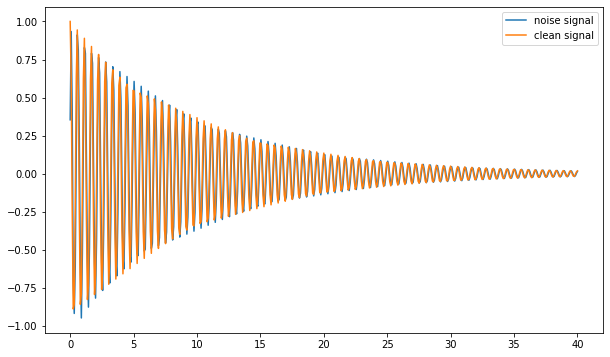

In [5]:


plt.figure(figsize=(10, 6))
plt.plot(tm,noise, label='noise signal')
plt.plot(tm,clean, label='clean signal')

plt.legend(loc='best')
plt.show()


Using weiner filter


In [6]:
!pip install astroML
from astroML.filters import wiener_filter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 134 kB 8.1 MB/s 


https://www.astroml.org/book_figures_1ed/chapter10/fig_wiener_filter.html

In [7]:
h_smooth, PSD, P_S, P_N, Phi = wiener_filter(tm, noise,return_PSDs=True)

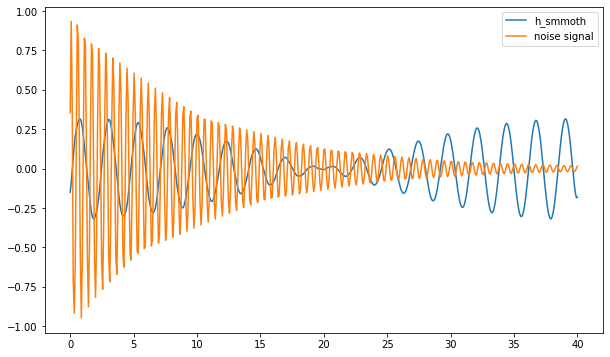

In [8]:

plt.figure(figsize=(10, 6))
plt.plot(tm,h_smooth,label = "h_smmoth")
plt.plot(tm,noise, label = "noise signal")




plt.legend(loc='best')
plt.show()

In [9]:
res = "\n".join("{} {}".format(x, y) for x, y in zip(clean, h_smooth))

In [10]:
print(res)

1.0 -0.14995137442056153
0.61293645507449 -0.08886417244776021
-0.232745124136721 -0.009742708924673665
-0.888523453545112 0.07341046035134782
-0.860165996460362 0.14776450618161918
-0.180033988148443 0.20612524295130719
0.625814067921961 0.24829484156106327
0.944344878931058 0.2784835818978215
0.541766083402566 0.30051567364194015
-0.265219229629636 0.31410926859873434
-0.858291872609368 0.31476382560778277
-0.791147265950322 0.2971901157510816
-0.125177520850641 0.2596486914495647
0.625137906838347 0.20594138367651613
0.889530243226272 0.1435996140569794
0.475235735007527 0.07967271814829441
-0.292832400893931 0.017278894751504466
-0.826667777757217 -0.044570117758798364
-0.72520526852853 -0.10789325866607752
-0.0754631482861739 -0.17190516556156088
0.62118608820838 -0.23144972433428707
0.835760543581875 -0.2789571328383035
0.413210009504265 -0.30847891902457014
-0.315951827109497 -0.31878951986092
-0.793968045039057 -0.31328164785498
-0.662367093057486 -0.2968298736409028
-0.0306122

In [11]:
from sklearn import metrics
print(metrics.mean_squared_error(clean,h_smooth))

0.09014962330571567


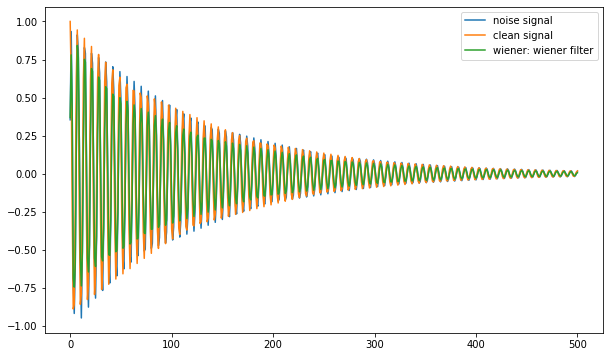

In [12]:
from scipy import signal
from matplotlib import pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(noise, label='noise signal')
plt.plot(clean, label='clean signal')
plt.plot(signal.wiener(noise), label='wiener: wiener filter')

plt.legend(loc='best')
plt.show()

In [13]:
res = "\n".join("{} {}".format(x, y) for x, y in zip(clean, signal.wiener(noise)))

In [14]:
print(res)

1.0 0.3685408554847027
0.61293645507449 0.7807058538644662
-0.232745124136721 0.4050363097479058
-0.888523453545112 -0.6873309244617594
-0.860165996460362 -0.7449348055365009
-0.180033988148443 -0.5834850180791182
0.625814067921961 0.13609161623008031
0.944344878931058 0.842662342472043
0.541766083402566 0.7628975986605515
-0.265219229629636 0.21138696359085185
-0.858291872609368 -0.5529230009975225
-0.791147265950322 -0.7370691547069581
-0.125177520850641 -0.5136056192374446
0.625137906838347 0.20655387031454586
0.889530243226272 0.7512227979898666
0.475235735007527 0.7327844037893139
-0.292832400893931 0.13967025980930975
-0.826667777757217 -0.5533535928269837
-0.72520526852853 -0.645430352029126
-0.0754631482861739 -0.46999829415149225
0.62118608820838 0.2506431273484406
0.835760543581875 0.6908373591290804
0.413210009504265 0.6716732967303661
-0.315951827109497 0.0974806512301235
-0.793968045039057 -0.5549579376413603
-0.662367093057486 -0.609540695562749
-0.0306122315794795 -0.413

In [15]:

from sklearn import metrics
print(metrics.mean_squared_error(clean,signal.wiener(noise)))

0.01648994909178201


In [16]:
len(noise)

501

In [17]:
noise_train = noise[:400]
noise_test = noise[400:]

clean_train = clean[:400]
clean_test = clean[400:]

using knn regressor

In [18]:
from sklearn.neighbors import KNeighborsRegressor
clf = KNeighborsRegressor(n_neighbors=100, weights='uniform')

In [19]:
clf.fit(noise_train.values.reshape(-1,1), clean_train)

KNeighborsRegressor(n_neighbors=100)

In [20]:
clean_pred = clf.predict(noise_test.values.reshape(-1,1))

In [21]:
res = "\n".join("{} {}".format(x, y) for x, y in zip(clean_test, clean_pred))

In [22]:
print(res)

-0.0329773157466767 -0.04136306357544986
-0.00152409326654096 -0.02512419618628676
0.0305855327203994 0.010735192070187739
0.0389938778263299 0.02412466206248117
0.0177014801403654 0.01791912221106505
-0.0166751755101751 0.00601049796076836
-0.0378621561414525 -0.032190699460907475
-0.0300036957473579 -0.04121822225468061
0.000480464433964782 -0.023480231127309726
0.030116445021489 0.007797467187772185
0.0364460959260553 0.02412466206248116
0.0150398653478513 0.01510752910132898
-0.0174306352079668 0.0024168603084452323
-0.0361688858869088 -0.032190699460907475
-0.0271844930849549 -0.040233807210506616
0.00227005508829221 -0.020541533708954163
0.02953580136404 0.008416503598605922
0.033973115541299 0.02215001332892562
0.0125797329733637 0.01553623720852091
-0.0180127172826334 0.0008360722249237355
-0.0344613610530403 -0.03327097501673611
-0.024518441775512 -0.03517643245035415
0.00385787332691898 -0.01882947398413397
0.0288585307987249 0.009314941660669217
0.0315802525945213 0.01791912

In [23]:
clean_pred = clf.predict(noise.values.reshape(-1,1))

In [24]:
res = "\n".join("{} {}".format(x, y) for x, y in zip(clean, clean_pred))
print(res)

1.0 0.2229506405669043
0.61293645507449 0.2996467915457752
-0.232745124136721 0.25203311633541303
-0.888523453545112 -0.2860619645390411
-0.860165996460362 -0.2860619645390411
-0.180033988148443 -0.28606196453904115
0.625814067921961 0.07740055824528347
0.944344878931058 0.2996467915457752
0.541766083402566 0.2996467915457752
-0.265219229629636 0.1913819067894558
-0.858291872609368 -0.2860619645390411
-0.791147265950322 -0.2860619645390411
-0.125177520850641 -0.28606196453904115
0.625137906838347 0.18114505000307848
0.889530243226272 0.2996467915457752
0.475235735007527 0.2996467915457752
-0.292832400893931 0.07912059921148411
-0.826667777757217 -0.2860619645390411
-0.72520526852853 -0.2860619645390411
-0.0754631482861739 -0.26324183236807236
0.62118608820838 0.1966100031815066
0.835760543581875 0.2996467915457752
0.413210009504265 0.2996467915457752
-0.315951827109497 0.06809101791099036
-0.793968045039057 -0.2860619645390411
-0.662367093057486 -0.2860619645390411
-0.0306122315794795 

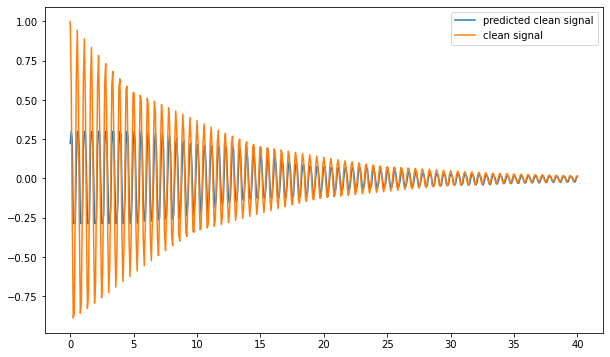

In [25]:
from scipy import signal
from matplotlib import pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(tm,clean_pred, label='predicted clean signal')
plt.plot(tm,clean, label='clean signal')


plt.legend(loc='best')
plt.show()

In [26]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [27]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)

In [28]:
scores = cross_val_score(clf, noise, clean, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_regression.py", line 213, in fit
    return self._fit(X, y)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py", line 400, in _fit
    X, y = self._validate_data(X, y, accept_sparse="csr", multi_output=True)
  File "/usr/local/lib

In [29]:
clean_pred = clf.predict(noise.values.reshape(-1,1))

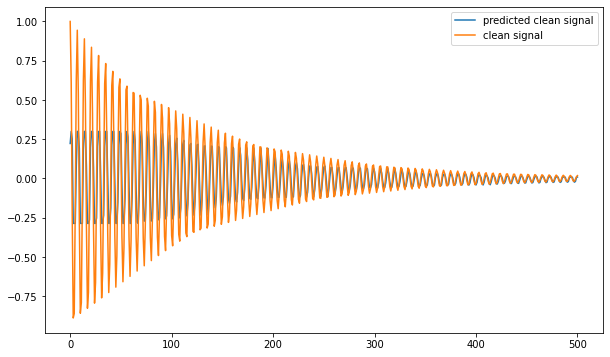

In [30]:
from scipy import signal
from matplotlib import pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(clean_pred, label='predicted clean signal')
plt.plot(clean, label='clean signal')


plt.legend(loc='best')
plt.show()

In [31]:
import xgboost as xgb
regressor=xgb.XGBRegressor(eval_metric='rmse')

In [32]:
regressor.fit(noise_train.values.reshape(-1,1), clean_train)

[19:10:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(eval_metric='rmse')

In [33]:
clean_pred = regressor.predict(noise.values.reshape(-1,1))

In [34]:
res = "\n".join("{} {}".format(x, y) for x, y in zip(clean, clean_pred))
print(res)

1.0 0.7620763182640076
0.61293645507449 0.6662288904190063
-0.232745124136721 -0.021660566329956055
-0.888523453545112 -0.7195225954055786
-0.860165996460362 -0.7957749366760254
-0.180033988148443 -0.3560534119606018
0.625814067921961 0.2901220917701721
0.944344878931058 0.8470617532730103
0.541766083402566 0.6628063917160034
-0.265219229629636 0.10484078526496887
-0.858291872609368 -0.7211019992828369
-0.791147265950322 -0.7829724550247192
-0.125177520850641 -0.34287363290786743
0.625137906838347 0.22951999306678772
0.889530243226272 0.8470617532730103
0.475235735007527 0.6532195806503296
-0.292832400893931 -0.01444309949874878
-0.826667777757217 -0.7211019992828369
-0.72520526852853 -0.7181328535079956
-0.0754631482861739 -0.30504369735717773
0.62118608820838 0.27828875184059143
0.835760543581875 0.7047373652458191
0.413210009504265 0.5763626098632812
-0.315951827109497 1.4007091522216797e-06
-0.793968045039057 -0.6496322154998779
-0.662367093057486 -0.6677365303039551
-0.03061223157

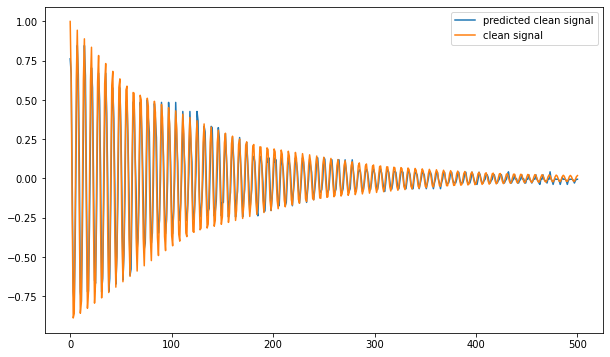

In [35]:
from scipy import signal
from matplotlib import pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(clean_pred, label='predicted clean signal')
plt.plot(clean, label='clean signal')


plt.legend(loc='best')
plt.show()

In [36]:

from sklearn import metrics
print(metrics.mean_squared_error(clean,clean_pred))

0.008668728287121182


Avarage smoothing

In [37]:
def average_smoothing(signal, kernel_size, stride):
    sample = []
    start = 0
    end = kernel_size
    while end <= len(signal):
        start = start + stride
        end = end + stride
        sample.append(np.mean(signal[start:end]))
    return np.array(sample)

In [53]:
sample = average_smoothing(noise,4,1)

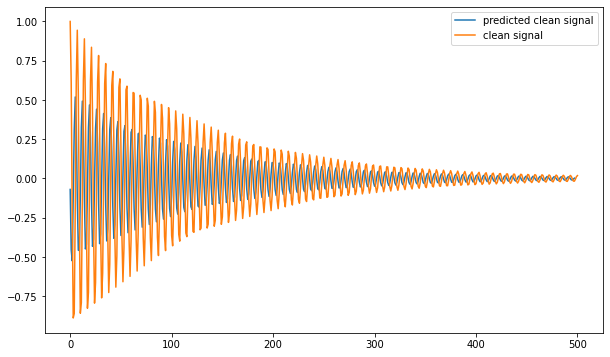

In [54]:
from scipy import signal
from matplotlib import pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(sample, label='predicted clean signal')
plt.plot(clean, label='clean signal')


plt.legend(loc='best')
plt.show()

In [55]:
SIGNAL_LEN = 500
SAMPLE_RATE = 12

In [56]:
import scipy
from scipy import signal
from scipy.signal import butter, deconvolve
import warnings
warnings.filterwarnings('ignore')

In [63]:
def high_pass_filter(x, low_cutoff=3, SAMPLE_RATE=SAMPLE_RATE):
  
    
    # nyquist frequency is half the sample rate https://en.wikipedia.org/wiki/Nyquist_frequency
    nyquist = 0.5 * SAMPLE_RATE
    norm_low_cutoff = low_cutoff / nyquist
    
    # Fault pattern usually exists in high frequency band. According to literature, the pattern is visible above 10^4 Hz.
    sos = butter(10, Wn=[norm_low_cutoff], btype='highpass', output='sos')
    filtered_sig = signal.sosfilt(sos, x)

    return np.array(filtered_sig)

In [64]:
signal = high_pass_filter(noise,3, SAMPLE_RATE)

TypeError: ignored

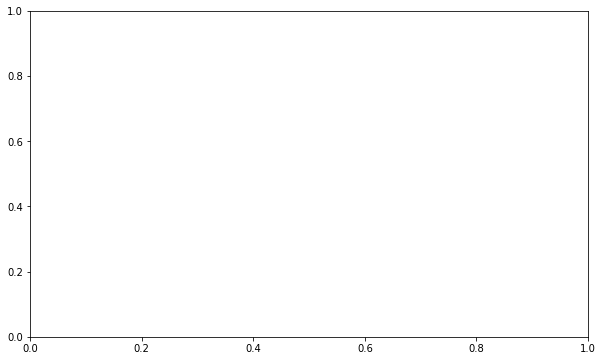

In [65]:
from scipy import signal
from matplotlib import pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(signal, label='predicted clean signal')
plt.plot(clean, label='clean signal')


plt.legend(loc='best')
plt.show()

In [66]:
import os
import gc
import numpy as np
from numpy.fft import *
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pywt 
from statsmodels.robust import mad
import scipy
from scipy import signal

In [69]:
def maddest(d, axis=None):
    """
    Mean Absolute Deviation
    """
    
    return np.mean(np.absolute(d - np.mean(d, axis)), axis)

In [76]:
def denoise_signal(x, wavelet='db4', level=1):
    """
    1. Adapted from waveletSmooth function found here:
    http://connor-johnson.com/2016/01/24/using-pywavelets-to-remove-high-frequency-noise/
    2. Threshold equation and using hard mode in threshold as mentioned
    in section '3.2 denoising based on optimized singular values' from paper by Tomas Vantuch:
    http://dspace.vsb.cz/bitstream/handle/10084/133114/VAN431_FEI_P1807_1801V001_2018.pdf
    """
    
    # Decompose to get the wavelet coefficients
    coeff = pywt.wavedec(x, wavelet, mode="per")
    
    # Calculate sigma for threshold as defined in http://dspace.vsb.cz/bitstream/handle/10084/133114/VAN431_FEI_P1807_1801V001_2018.pdf
    # As noted by @harshit92 MAD referred to in the paper is Mean Absolute Deviation not Median Absolute Deviation
    sigma = (1/0.6745) * maddest(coeff[-level])

    # Calculate the univeral threshold
    uthresh = sigma * np.sqrt(2*np.log(len(x)))
    coeff[1:] = (pywt.threshold(i, value=uthresh, mode='hard') for i in coeff[1:])
    
    # Reconstruct the signal using the thresholded coefficients
    return np.vectorize(float(pywt.waverec(coeff, wavelet, mode='per')))

In [77]:
signal = denoise_signal(noise,'db4',1)

TypeError: ignored

In [ ]:
print(signal)

TypeError: ignored

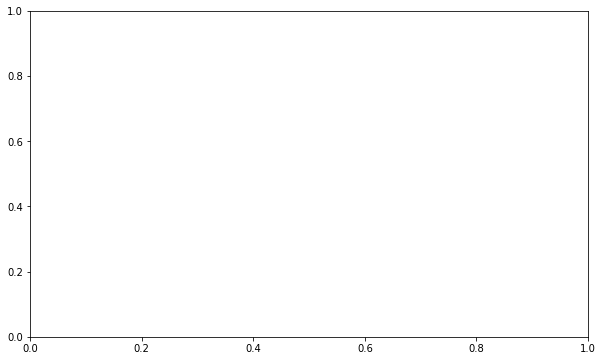

In [73]:
from scipy import signal
from matplotlib import pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(signal, label='predicted clean signal')
plt.plot(clean, label='clean signal')


plt.legend(loc='best')
plt.show()

In [78]:
from sklearn.decomposition import PCA